In [411]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [412]:
# Importing Datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")


In [413]:
train.shape, test.shape

((54808, 14), (23490, 13))

In [414]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [415]:
#Education and Previous Year Rating has null values

In [416]:
train.head(5)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


#Finding Duplicates

In [417]:
train.duplicated().sum()

np.int64(0)

In [418]:
# Unique values of each feature
train.nunique()

,0
employee_id,54808
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,10
age,41
previous_year_rating,5
length_of_service,35


In [419]:
train['is_promoted'].value_counts()

,count
is_promoted,
0,50140
1,4668


In [420]:
ign_cols = ["employee_id"]
target_col = ["is_promoted"]

In [421]:
for col in train.drop(columns=["employee_id"]).columns:
  print (col)
  print (train[col].unique())


department
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education
["Master's & above" "Bachelor's" nan 'Below Secondary']
gender
['f' 'm']
recruitment_channel
['sourcing' 'other' 'referred']
no_of_trainings
[ 1  2  3  4  7  5  6  8 10  9]
age
[35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40 42 23 59 44 50
 56 20 25 47 36 46 60 43 22 54 58 48 53 55 51 52 21]
previous_year_rating
[ 5.  3.  1.  4. nan  2.]
length_of_service
[ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17 14 13 19 15 23 18 20 22 25
 28 24 31 21 29 30 34

<Axes: xlabel='is_promoted'>

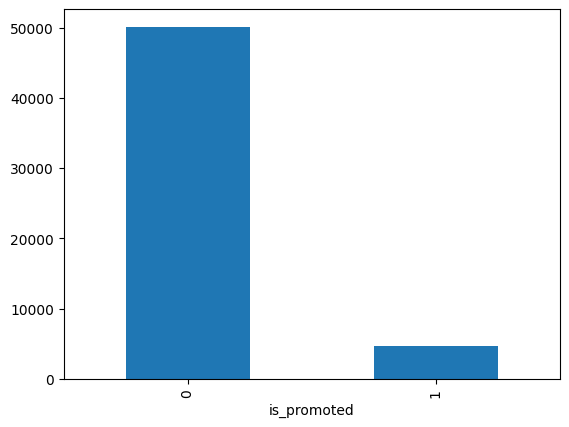

In [422]:
train['is_promoted'].value_counts().plot(kind='bar')

#Exploratory Data Analytics (EDA)

***Outlier Detection For Numerical columns***

<Axes: ylabel='no_of_trainings'>

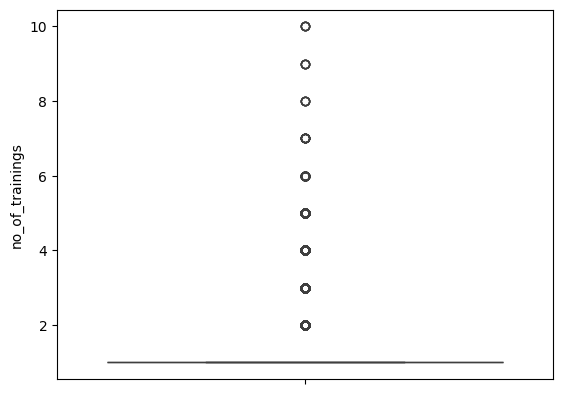

In [423]:
#Checking Outliers for numerical columns
sns.boxplot(train["no_of_trainings"])

<Axes: ylabel='age'>

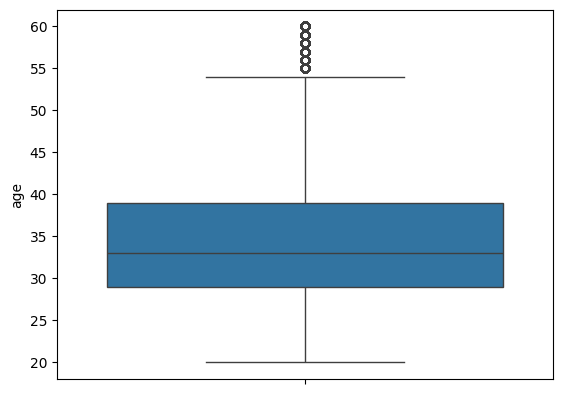

In [424]:
sns.boxplot(train["age"])

<Axes: ylabel='previous_year_rating'>

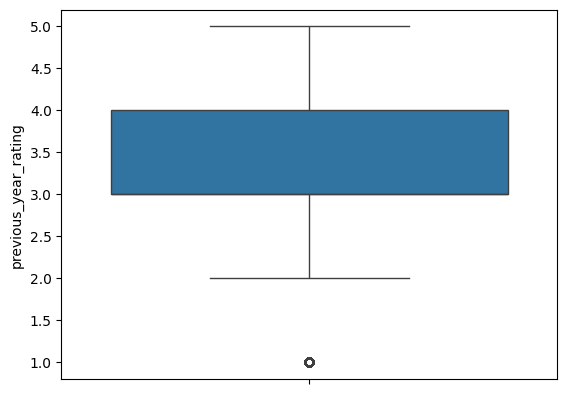

In [425]:
sns.boxplot(train["previous_year_rating"])

<Axes: ylabel='length_of_service'>

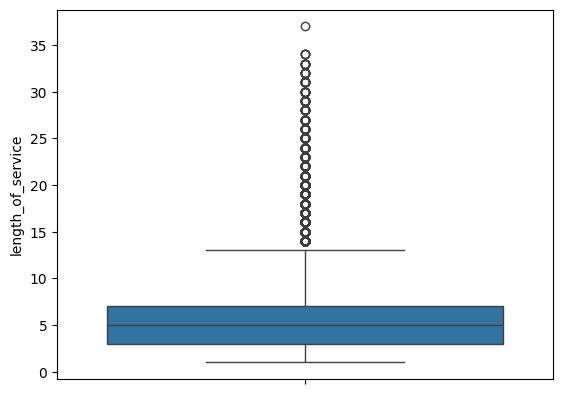

In [426]:
sns.boxplot(train["length_of_service"])

***Frequency of column values in categorical columns***

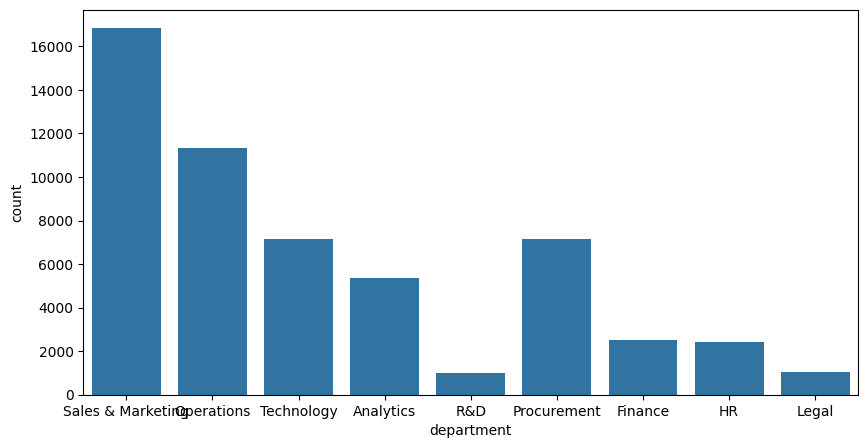

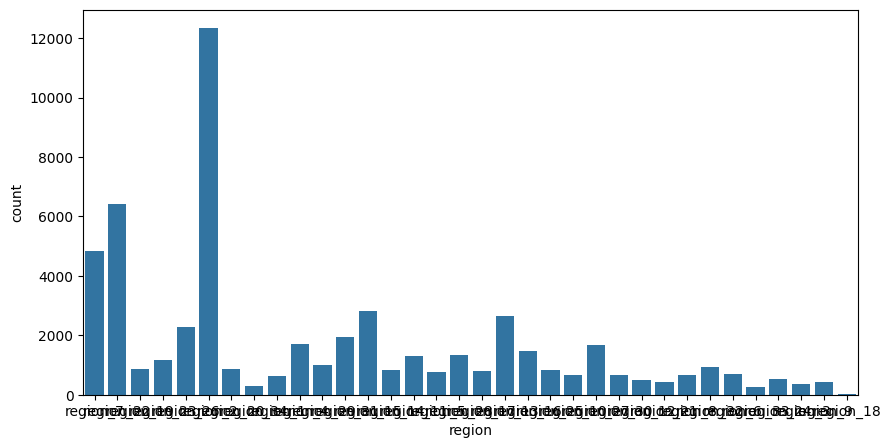

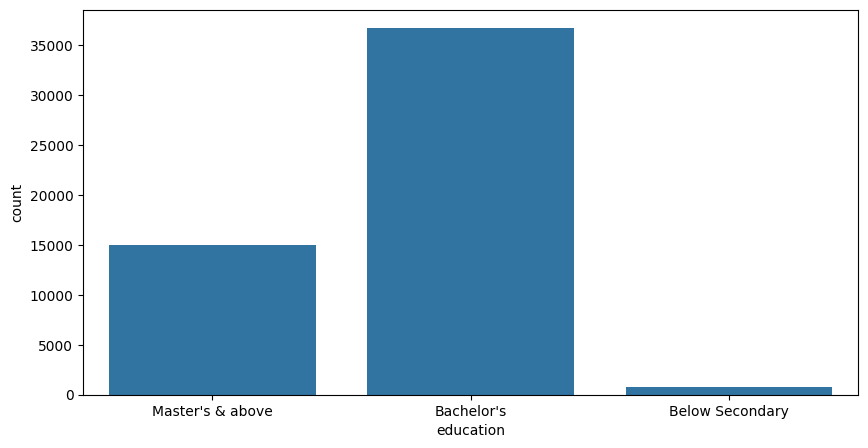

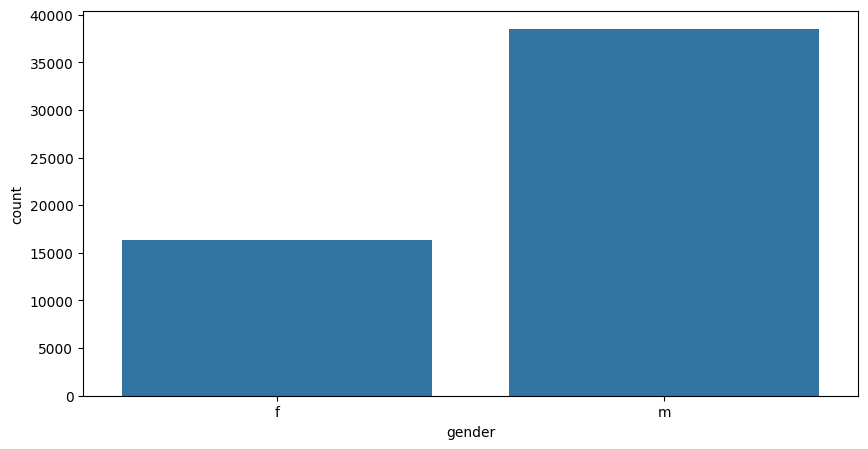

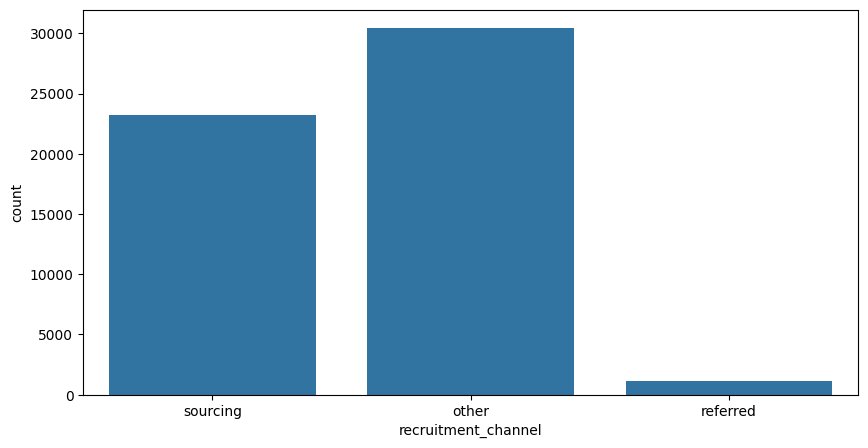

In [427]:
for col in train.select_dtypes(include="object").columns:
  plt.figure(figsize=(10,5))
  sns.countplot(data=train, x=col)
  plt.show()


In [428]:
num_cols = train.select_dtypes(include="number").columns.to_list()
num_cols = train.drop(columns=ign_cols).select_dtypes(include="number").columns


num_cols

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [429]:
cat_cols = train.select_dtypes(exclude="number").columns.to_list()
cat_cols

['department', 'region', 'education', 'gender', 'recruitment_channel']

#Understanding the relationship of features/contribution in deriving the output/prediction

No of Trainings vs Is Promoted


<Axes: xlabel='no_of_trainings', ylabel='is_promoted'>

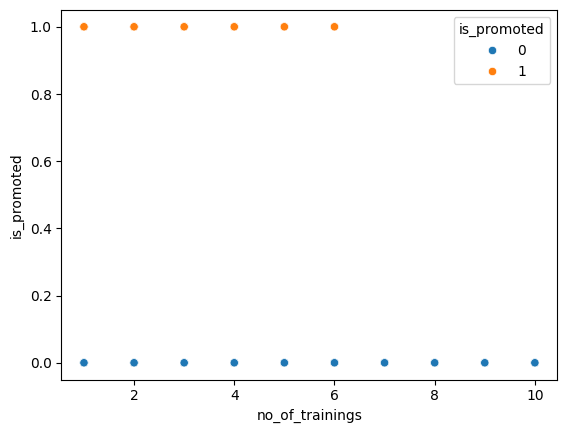

In [430]:
print("No of Trainings vs Is Promoted")

sns.scatterplot(x = 'no_of_trainings', y = 'is_promoted', hue = 'is_promoted', data = train)

age vs Is Promoted


<Axes: xlabel='age', ylabel='is_promoted'>

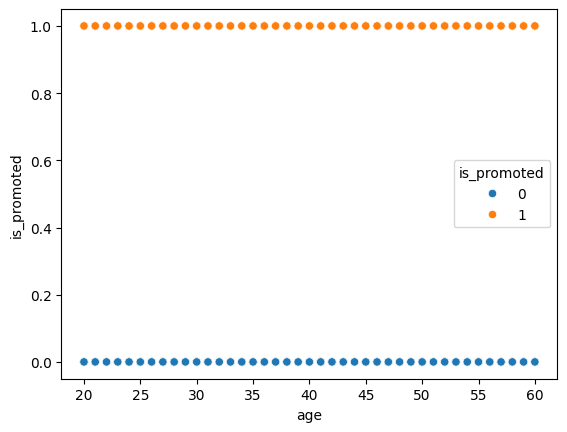

In [431]:
print("age vs Is Promoted")

sns.scatterplot(x = 'age', y = 'is_promoted', hue = 'is_promoted', data = train)

previous_year_rating vs Is Promoted


<Axes: xlabel='previous_year_rating', ylabel='is_promoted'>

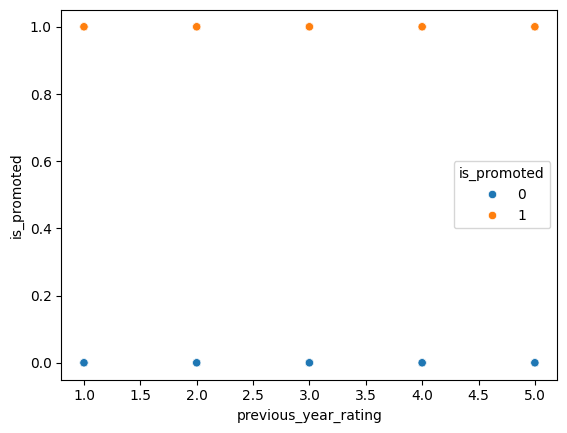

In [432]:
print("previous_year_rating vs Is Promoted")

sns.scatterplot(x = 'previous_year_rating', y = 'is_promoted', hue = 'is_promoted', data = train)

length_of_service vs Is Promoted


<Axes: xlabel='length_of_service', ylabel='is_promoted'>

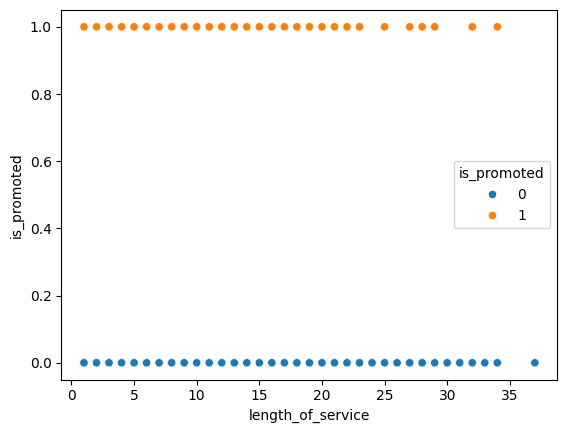

In [433]:
print("length_of_service vs Is Promoted")

sns.scatterplot(x = 'length_of_service', y = 'is_promoted', hue = 'is_promoted', data = train)

KPIs_met >80% vs Is Promoted


<Axes: xlabel='KPIs_met >80%', ylabel='is_promoted'>

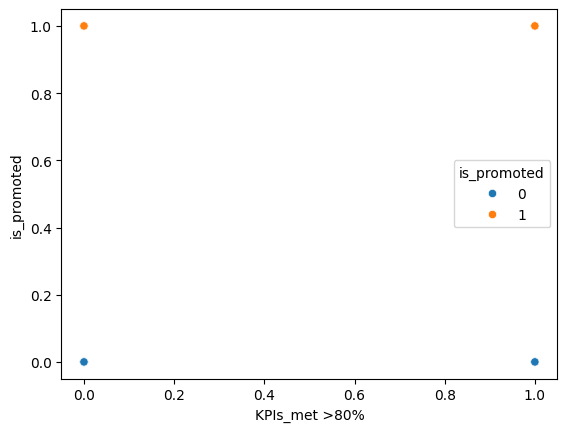

In [434]:
print("KPIs_met >80% vs Is Promoted")

sns.scatterplot(x = 'KPIs_met >80%', y = 'is_promoted', hue = 'is_promoted', data = train)

awards_won? vs Is Promoted


<Axes: xlabel='awards_won?', ylabel='is_promoted'>

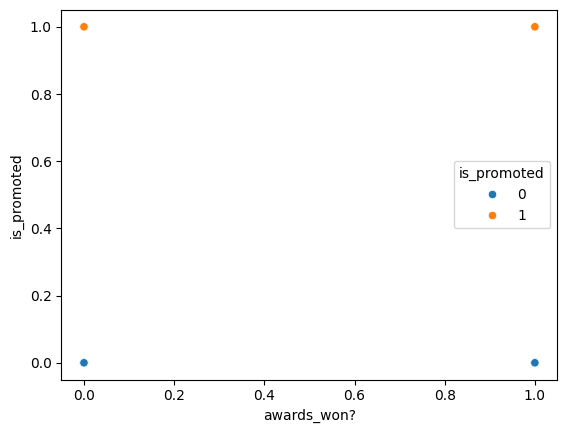

In [435]:
print("awards_won? vs Is Promoted")

sns.scatterplot(x = 'awards_won?', y = 'is_promoted', hue = 'is_promoted', data = train)

avg_training_score vs Is Promoted


<Axes: xlabel='avg_training_score', ylabel='is_promoted'>

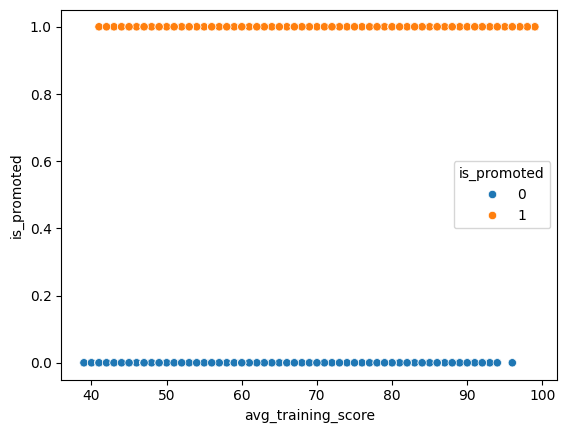

In [436]:
print("avg_training_score vs Is Promoted")

sns.scatterplot(x = 'avg_training_score', y = 'is_promoted', hue = 'is_promoted', data = train)

avg_training_score vs Is Promoted


<Axes: xlabel='avg_training_score', ylabel='is_promoted'>

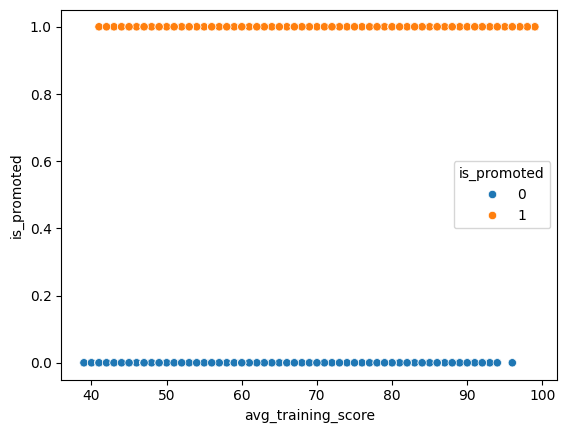

In [437]:
print("avg_training_score vs Is Promoted")

sns.scatterplot(x = 'avg_training_score', y = 'is_promoted', hue = 'is_promoted', data = train)

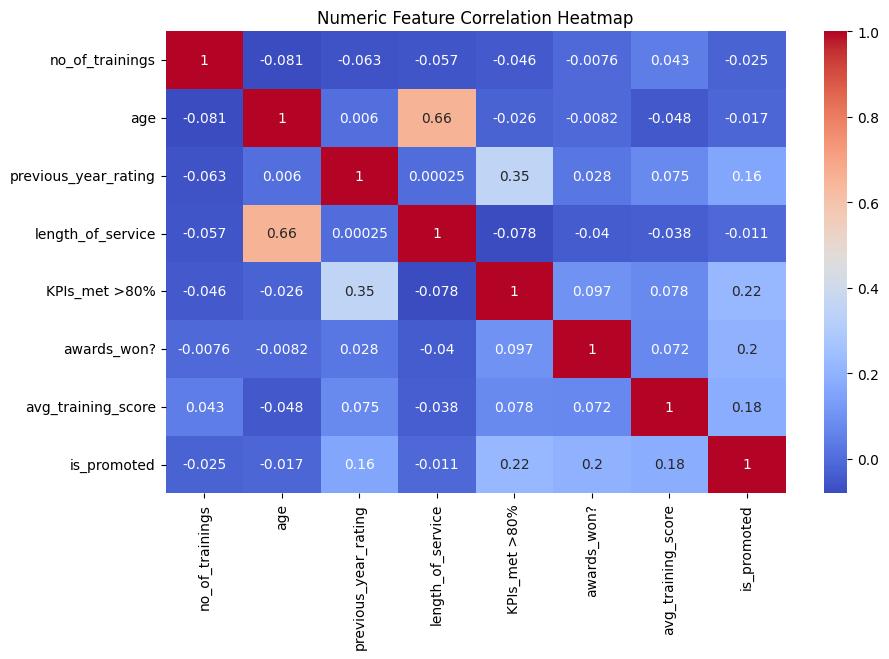

In [438]:
# Correlation heatmap (numeric features) Pearson Coefficent
#num_cols = train.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10,6))
sns.heatmap(train[num_cols].corr(), cmap='coolwarm', annot=True)
plt.title("Numeric Feature Correlation Heatmap")
plt.show()

In [439]:
# Chi-square test for categorical vs target
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

#cat_cols = train.select_dtypes(exclude=np.number).columns
chi_results = []

#Chi-Square is a test for variance
for c in cat_cols:
    contingency = pd.crosstab(train[c], train["is_promoted"])
    chi2_stat, p, dof, ex = chi2_contingency(contingency)
    chi_results.append((c, chi2_stat, p))
chi_df = pd.DataFrame(chi_results, columns=["Feature","Chi2","p_value"]).sort_values("p_value")
print("Chi-Square association with is_promoted (lower p = stronger association):")
display(chi_df)


Chi-Square association with is_promoted (lower p = stronger association):


,Feature,Chi2,p_value
1,region,475.640238,7.275378e-80
0,department,151.426355,9.882497e-29
2,education,36.702959,1.071652e-08
4,recruitment_channel,19.236335,6.650938e-05
3,gender,6.677255,9.765092e-03


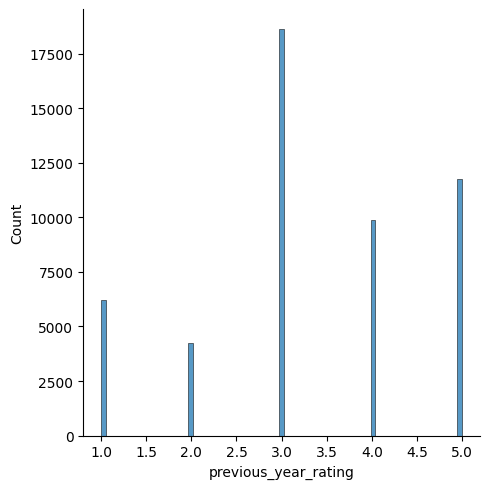

In [440]:
#Distribution plot for Previous Year Rating to choose mean or median for imputation
sns.displot(train, x='previous_year_rating')

#Observation on EDA:



*   Imbalanced Data - chance of promotion is less - which is usual as promotion number would be always lesser than non-promoted count


*   Outliers in the age, length of service, no_of trainings are normal in tis business context and it cant be treated as noise






*   Numerical features doesnt contribute much in the promotion
*   Length of service and age have correlation - have to try by having both and by dropping age


*   Thinking of adding a new feature on close to retirement - may or may not have promotion chance





*   Categorical Features contributing


*   Previous YearRating - Imputation using mean value as it has normal distribution
*   Education - Using mode











#Feature Engineering

In [441]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
#from imblearn.pipeline import Pipeline

In [442]:
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown = "ignore"))
])
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [443]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scale", StandardScaler())
])
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scale', StandardScaler())])

In [444]:

num_features = train.drop(columns=ign_cols+target_col).select_dtypes(include="number").columns.to_list()
num_features



['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score']

In [445]:
preprocessor = ColumnTransformer(transformers=[
    ("num_col", num_pipeline, num_features),
    ("cat_col", cat_pipeline, cat_cols)
])
preprocessor

ColumnTransformer(transformers=[('num_col',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scale', StandardScaler())]),
                                 ['no_of_trainings', 'age',
                                  'previous_year_rating', 'length_of_service',
                                  'KPIs_met >80%', 'awards_won?',
                                  'avg_training_score']),
                                ('cat_col',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['department', 'region', 'education', 'gender',
                                  'recruitment_channel'])])

# Model Building

In [446]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [ ]:
#('undersample', RandomUnderSampler(random_state=42)),

In [447]:
model_LR_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),

    ("model", LogisticRegression())
])
model_LR_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score']),
                                                 ('cat_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel'])])),
                ('model', LogisticRegression())])

In [448]:
ign_cols, target_col

(['employee_id'], ['is_promoted'])

In [449]:
X = train.drop(columns=ign_cols+target_col)

y = train[target_col]
X.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [450]:
y.head()

,is_promoted
0,0
1,0
2,0
3,0
4,0


In [451]:
y.value_counts()


,count
is_promoted,
0,50140
1,4668


In [452]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((43846, 12), (10962, 12), (43846, 1), (10962, 1))

In [453]:
model_LR_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score']),
                                                 ('cat_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel'])])),
                ('model', LogisticRegression())])

In [454]:
train_pred = model_LR_pipeline.predict(train_X)
test_pred = model_LR_pipeline.predict(test_X)

In [455]:
train['is_promoted'].value_counts(), train_y.value_counts(), test_y.value_counts()

(is_promoted
 0    50140
 1     4668
 Name: count, dtype: int64,
 is_promoted
 0              40086
 1               3760
 Name: count, dtype: int64,
 is_promoted
 0              10054
 1                908
 Name: count, dtype: int64)

#Classification Report

In [456]:


print(classification_report(train_y, train_pred))
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     40086
           1       0.82      0.26      0.40      3760

    accuracy                           0.93     43846
   macro avg       0.88      0.63      0.68     43846
weighted avg       0.93      0.93      0.92     43846

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10054
           1       0.78      0.25      0.38       908

    accuracy                           0.93     10962
   macro avg       0.86      0.62      0.67     10962
weighted avg       0.92      0.93      0.92     10962



# Confusion Matrix

In [457]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(train_y, train_pred)
confusion_matrix_train

array([[39870,   216],
       [ 2767,   993]])

In [459]:
from sklearn.metrics import confusion_matrix

confusion_matrix_test = confusion_matrix(test_y, test_pred)
confusion_matrix_test

array([[9991,   63],
       [ 678,  230]])

#F1 Score

In [460]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
f1_score = f1_score(train_y, train_pred)
print(f"Train f1_score ---" , f1_score)



Train f1_score --- 0.39967800362245925


In [461]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
f1_score = f1_score(test_y, test_pred)
f1_score
print(f"Test f1_score ---" , f1_score)

Test f1_score --- 0.38301415487094087


#Prediction using Default threshold (0.5)

In [462]:
sub["is_promoted"] = model_LR_pipeline.predict(test.drop(columns=ign_cols))
sub.to_csv('Promotion_LR__US.csv',index=False)


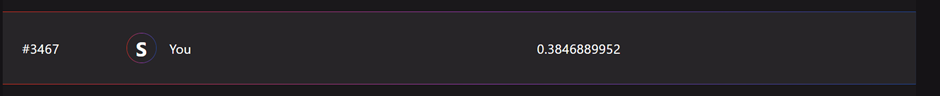

In [463]:
sub.tail(10)

,employee_id,is_promoted
23480,11837,0
23481,78278,0
23482,27284,0
23483,49291,0
23484,47537,0
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0
23489,5973,1


# Threshold Tuning

In [464]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [465]:
def getF1Score(actual, pred):
  return f1_score(actual, pred)

def getRecallScore(actual, pred):
  return recall_score(actual, pred)

def getPrecisionScore(actual, pred):
  return precision_score(actual, pred)

def getAccuracyScore(actual, pred):
  return accuracy_score(actual, pred)


Threshold: 0.0, Accuracy: 0.08283160007297938, F1: 0.15299073294018534, Recall: 1.0, Precision: 0.08283160007297938
Threshold: 0.05, Accuracy: 0.6982302499543879, F1: 0.33306451612903226, Recall: 0.9096916299559471, Precision: 0.20384995064165845
Threshold: 0.1, Accuracy: 0.8116219667943806, F1: 0.3931824860417279, Recall: 0.736784140969163, Precision: 0.2681362725450902
Threshold: 0.15000000000000002, Accuracy: 0.8613391716839993, F1: 0.4198473282442748, Recall: 0.6057268722466961, Precision: 0.3212616822429907
Threshold: 0.2, Accuracy: 0.8939974457215837, F1: 0.44719314938154137, Recall: 0.5176211453744494, Precision: 0.3936348408710218
Threshold: 0.25, Accuracy: 0.9097792373654443, F1: 0.449638286032276, Recall: 0.44493392070484583, Precision: 0.4544431946006749
Threshold: 0.30000000000000004, Accuracy: 0.9209085933223864, F1: 0.455743879472693, Recall: 0.3997797356828194, Precision: 0.5299270072992701
Threshold: 0.35000000000000003, Accuracy: 0.9271118409049444, F1: 0.4478230822391

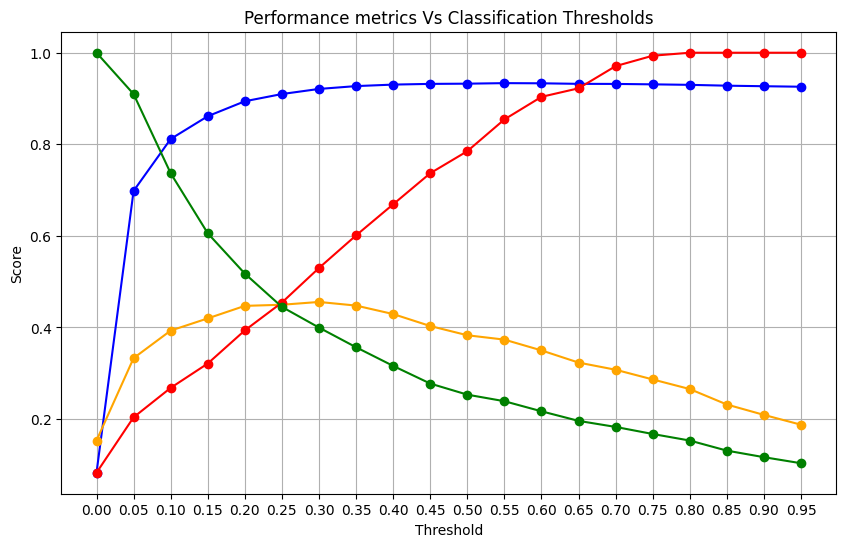

In [467]:


test_y_probability = model_LR_pipeline.predict_proba(test_X)[:,1]
res = []
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

thresholds = np.arange(0, 1, 0.05)

for threshold in thresholds:
  test_pred_y =np.where(test_y_probability >= threshold, 1, 0)
  accuracy = getAccuracyScore(test_y, test_pred_y)
  f1 = getF1Score(test_y, test_pred_y)
  recall = getRecallScore(test_y, test_pred_y)
  precision = getPrecisionScore(test_y, test_pred_y)
  accuracy_scores.append(accuracy)
  f1_scores.append(f1)
  recall_scores.append(recall)
  precision_scores.append(precision)
  res.append([threshold,accuracy_scores,f1_scores,recall_scores,precision_scores])
  print(f"Threshold: {threshold}, Accuracy: {accuracy}, F1: {f1}, Recall: {recall}, Precision: {precision}")

plt.figure(figsize=(10,6))
plt.plot(thresholds, accuracy_scores, label="Accuracy", marker="o", color="blue")
plt.plot(thresholds, f1_scores, label="F1 Score", marker="o", color="orange")
plt.plot(thresholds, precision_scores, label="Precision", marker="o", color="red")
plt.plot(thresholds, recall_scores, label="Recall", marker="o", color="green")
plt.title("Performance metrics Vs Classification Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.grid(True)
plt.xticks(thresholds)
plt.show()

#Applying a threshold of 0.45 / 0.39 after undersampling

In [471]:
test_y_probability

array([0.00641958, 0.01287469, 0.03791459, ..., 0.19447405, 0.01298626,
       0.03244329])

In [472]:
# Applying for test split data
tuned_test_pred = np.where(test_y_probability >= 0.45, 1, 0)
tuned_test_pred


array([0, 0, 0, ..., 0, 0, 0])

In [473]:
test_pred_y

array([0, 0, 0, ..., 0, 0, 0])

In [474]:
F1_Score = getF1Score(test_y, tuned_test_pred)
print(f"F1_Score of test split after threshold tuning to 0.45 : {F1_Score}")

F1_Score of test split after threshold tuning to 0.45 : 0.4032


In [475]:

test_sub_pred_prob = model_LR_pipeline.predict_proba(test.drop(columns=ign_cols))[:,1]
sub["is_promoted"] = np.where(test_sub_pred_prob >= 0.39, 1, 0)
sub.to_csv('Promotion_LR__US_sub23.csv',index=False)

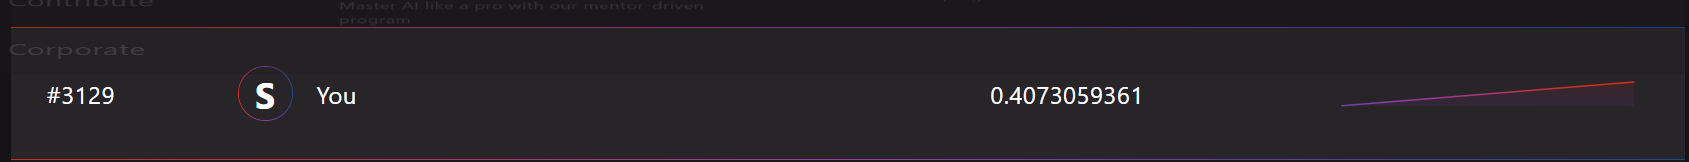

# Adjusting the threshold to 0.35

In [477]:
# Applying for test split data
tuned_test_pred = np.where(test_y_probability >= 0.35, 1, 0)
tuned_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [478]:
F1_Score = getF1Score(test_y, tuned_test_pred)
print(f"F1_Score of test split after threshold tuning to 0.35 : {F1_Score}")

F1_Score of test split after threshold tuning to 0.35 : 0.44782308223911543


In [479]:

test_sub_pred_prob = model_LR_pipeline.predict_proba(test.drop(columns=ign_cols))[:,1]
sub["is_promoted"] = np.where(test_sub_pred_prob >= 0.35, 1, 0)
sub.to_csv('Promotion_LR__Imb_Threshold0.35_sub3.csv',index=False)

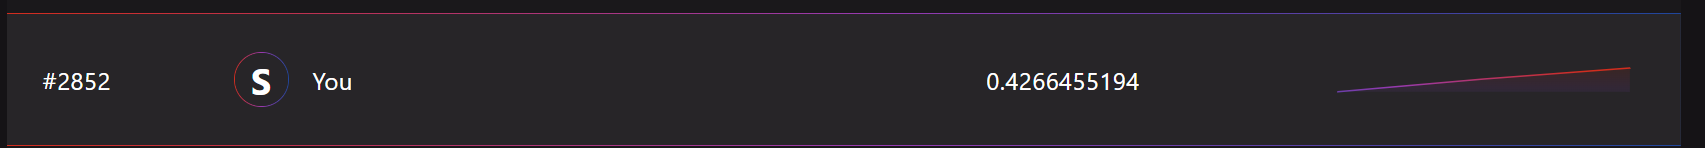

#Done Feature Engineering by removing age column as it correlates with length_of service. got low score in submission

# Grid Search

In [480]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [481]:
def evaluate_model_performance(train_X, train_y, val_X, val_y, model_pipeline):
 predicted_train_target =  model_pipeline.predict(train_X)
 predicted_test_target =  model_pipeline.predict(test_X)
 print('train score :', getF1Score(train_y, predicted_train_target))
 print('test score :', getF1Score(test_y, predicted_test_target))

In [487]:
grid_params = [
    {
        'model' : [LogisticRegression(max_iter=100)],
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs'],
        'model__C' : [0.5, 3],
        'model__class_weight': ['balanced'],
        'model__random_state': [42]

    },
    {
      'model': [LogisticRegression(max_iter=100)],
      'model__penalty': ['l1'],
      'model__solver': ['saga'],
      'model__C': [0.5, 3],
      'model__class_weight': ['balanced'],
      'model__random_state': [42]
}

]

In [488]:
train_y['is_promoted'].value_counts()
40086/3760

10.661170212765958

In [489]:
grid_1 = GridSearchCV(estimator=model_LR_pipeline, param_grid=grid_params, cv=2,scoring='f1_weighted')

In [490]:
grid_1.fit(train_X, train_y)


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_col',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'KPIs_met '
                                                                          '>80%',
                                                                          'awards_won?',
                                                                          'avg_training_score']),
                                                                        ('cat_col',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(...
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__class_weight': ['balanced'],
                          'model__penalty': ['l2'], 'model__random_state': [42],
                          'model__solver': ['lbfgs']},
                         {'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__class_weight': ['balanced'],
                          'model__penalty': ['l1'], 'model__random_state': [42],
                          'model__solver': ['saga']}],
             scoring='f1_weighted')

In [491]:
grid_1.best_params_

grid_1.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score']),
                                                 ('cat_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel'])])),
                ('model',
                 LogisticRegression(C=3, class_weight='balanced', penalty='l1',
                                    random_state=42, solver='saga'))])

In [492]:
res_df_1 = pd.DataFrame(grid_1.cv_results_)
#grid_1.cv_results_
pd.set_option('display.max_colwidth', 1000)
res_df_1[['param_model','params','mean_test_score','rank_test_score']]

,param_model,params,mean_test_score,rank_test_score
0,LogisticRegression(),"{'model': LogisticRegression(), 'model__C': 0.5, 'model__class_weight': 'balanced', 'model__penalty': 'l2', 'model__random_state': 42, 'model__solver': 'lbfgs'}",0.815877,4
1,LogisticRegression(),"{'model': LogisticRegression(), 'model__C': 3, 'model__class_weight': 'balanced', 'model__penalty': 'l2', 'model__random_state': 42, 'model__solver': 'lbfgs'}",0.816961,2
2,LogisticRegression(),"{'model': LogisticRegression(), 'model__C': 0.5, 'model__class_weight': 'balanced', 'model__penalty': 'l1', 'model__random_state': 42, 'model__solver': 'saga'}",0.816370,3
3,LogisticRegression(),"{'model': LogisticRegression(), 'model__C': 3, 'model__class_weight': 'balanced', 'model__penalty': 'l1', 'model__random_state': 42, 'model__solver': 'saga'}",0.817146,1


In [493]:
new_model = grid_1.best_estimator_

In [494]:
evaluate_model_performance(train_X, train_y, test_X, test_y, new_model)

train score : 0.3753698224852071
test score : 0.3791140806731007


In [495]:
tuned_sub_pred_prob = new_model.predict_proba(test.drop(columns=ign_cols))[:,1]
sub["is_promoted"] = np.where(tuned_sub_pred_prob >= 0.35, 1, 0)
sub.to_csv('Promotion_RF_Imb_Threshold0.35_sub20.csv',index=False)


In [496]:
tuned_sub_pred_prob = new_model.predict_proba(test.drop(columns=ign_cols))[:,1]
sub["is_promoted"] = np.where(tuned_sub_pred_prob >= 0.55, 1, 0)
sub.to_csv('Promotion_RF_Imb_Threshold0.55_sub21.csv',index=False)

In [497]:
tuned_sub_pred_prob = new_model.predict_proba(test.drop(columns=ign_cols))[:,1]
sub["is_promoted"] = np.where(tuned_sub_pred_prob >= 0.45, 1, 0)
sub.to_csv('Promotion_RF_Imb_Threshold0.45_sub21.csv',index=False)

# Under Sampling

In [498]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

In [499]:
# Sampling only for train dataset
train_us_X, train_us_y = undersampler.fit_resample(train_X,train_y)

In [500]:
train_us_y.value_counts()

,count
is_promoted,
0,3760
1,3760


In [501]:
evaluate_model_performance(train_us_X, train_us_y, test_X, test_y, new_model)

train score : 0.7927623014839885
test score : 0.3791140806731007


In [502]:
grid_1.fit(train_X, train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_col',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'KPIs_met '
                                                                          '>80%',
                                                                          'awards_won?',
                                                                          'avg_training_score']),
                                                                        ('cat_col',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(...
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__class_weight': ['balanced'],
                          'model__penalty': ['l2'], 'model__random_state': [42],
                          'model__solver': ['lbfgs']},
                         {'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__class_weight': ['balanced'],
                          'model__penalty': ['l1'], 'model__random_state': [42],
                          'model__solver': ['saga']}],
             scoring='f1_weighted')

In [503]:
tuned_sub_US_pred_prob = new_model.predict_proba(test.drop(columns=ign_cols))[:,1]
sub["is_promoted"] = np.where(tuned_sub_US_pred_prob >= 0.55, 1, 0)
sub.to_csv('Promotion_LRL1__IMB_Threshold0.55_sub24.csv',index=False)

# Oversampling

In [505]:
# Over sampling
from imblearn.over_sampling import RandomOverSampler

over_sampling = RandomOverSampler()

train_X.shape, train_y.shape



((43846, 12), (43846, 1))

In [506]:
train_y.value_counts()


,count
is_promoted,
0,40086
1,3760


In [89]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X, train_y)

train_X_os.shape, train_y_os.shape

((80172, 12), (80172, 1))

In [90]:
train_y_os.value_counts()

,count
is_promoted,
0,40086
1,40086


In [91]:
evaluate_model_performance(train_X_os, train_y_os, test_X, test_y, new_model)

train score : 0.8583924268895664
test score : 0.38784713980536434


In [92]:
grid_1.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('rename',
                                        FunctionTransformer(feature_names_out='one-to-one',
                                                            func=<function rename_columns at 0x78d25d1b1580>)),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('num_col',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_servic...
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None, ...)],
                          'model__colsample_bytree': [0.6, 0.7, 0.9, 1],
                          'model__learning_rate': [0.1],
                          'model__max_depth': [3, 5],
                          'model__random_state': [42],
                          'model__reg_alpha': [0.3, 0.5, 0.7, 1],
                          'model__reg_lambda': [0.3, 0.5, 0.7, 1],
                          'model__scale_pos_weight': [10.661170212765958],
                          'model__subsample': [0.6, 0.7, 0.9, 1]}],
             scoring='f1_weighted')

In [94]:
tuned_sub_OS_pred_prob = new_model.predict_proba(test.drop(columns=ign_cols))[:,1]
sub["is_promoted"] = np.where(tuned_sub_OS_pred_prob >= 0.55, 1, 0)
sub.to_csv('Promotion_XGB__OS_Threshold0.55_sub17.csv',index=False)

# Pickle File Generation

In [184]:
import joblib

In [276]:
joblib.dump(new_model, 'promotion_LR_Imb_model.pkl')

['promotion_LR_Imb_model.pkl']

In [277]:
!pip install streamlit

In [278]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [296]:
%%writefile webview.py
import streamlit as st
import pandas as pd
import joblib

st.title("Predicting Promotion")
df = pd.read_csv("train.csv")


employee_id = st.number_input("employee_id")
no_of_trainings = st.selectbox('No: of Trainings',df['no_of_trainings'].unique())
age = st.number_input("age")
previous_year_rating = st.selectbox('Last Year Rating',df['previous_year_rating'].unique())
length_of_service = st.selectbox('Overall Experience',df['length_of_service'].unique())

kPI_met = st.selectbox('Education Level',df['KPIs_met >80%'].unique())
award_won = st.selectbox('Award Won',df['awards_won?'].unique())
avg_training_score = st.selectbox('Avg. Training Score',df['avg_training_score'].unique())
department = st.selectbox('Department',df['department'].unique())
region = st.selectbox('Region',df['region'].unique())
education = st.selectbox('Education',df['education'].unique())
gender = st.selectbox('Gender',df['gender'].unique())
recruitment_channel = st.selectbox('Recruitment Channel',df['recruitment_channel'].unique())

inputs = {
    "no_of_trainings": no_of_trainings,
    "age": age,
    "previous_year_rating": previous_year_rating,
    "length_of_service": length_of_service,
    "KPIs_met >80%": kPI_met,
    "awards_won?": award_won,
    "avg_training_score": avg_training_score,
    "department": department,
    "region": region,
    "education": education,
    "gender": gender,
    "recruitment_channel": recruitment_channel
}
if(st.button("Predict")):
  model = joblib.load("promotion_LR_Imb_model.pkl")
  X_inputs = pd.DataFrame([inputs])
  prediction = model.predict(X_inputs)
  st.write(prediction)


Overwriting webview.py


In [297]:
!pip install pyngrok

In [298]:
!ngrok authtoken 378kZFQZ6Ie4lSJeqFNbuS2lip8_3tHMvSUw5B2DoBDWZJApn

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [299]:
!streamlit run webview.py & ngrok http 8501 --log stdout

INFO[01-04|05:52:55] no configuration paths supplied 
INFO[01-04|05:52:55] using configuration at default config path path=/root/.config/ngrok/ngrok.yml
INFO[01-04|05:52:55] open config file                         path=/root/.config/ngrok/ngrok.yml err=nil
t=2026-01-04T05:52:55+0000 lvl=info msg="FIPS 140 mode" enabled=false
t=2026-01-04T05:52:55+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040 allow_hosts=[]
t=2026-01-04T05:52:55+0000 lvl=info msg="client session established" obj=tunnels.session
t=2026-01-04T05:52:55+0000 lvl=info msg="tunnel session started" obj=tunnels.session
t=2026-01-04T05:52:55+0000 lvl=info msg="started tunnel" obj=tunnels name=command_line addr=http://localhost:8501 url=https://visualizable-cathleen-rarer.ngrok-free.dev



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.200.123:8501

t=2026-01-04T05:53:02+0000 lvl=info msg="join 

In [285]:
import pandas
pandas.__version__

'2.2.2'

In [287]:
import numpy
numpy.__version__

'2.0.2'

In [289]:
import joblib
joblib.__version__

'1.5.3'

In [291]:
!python --version

Python 3.12.12


In [293]:
import streamlit
streamlit.__version__

'1.52.2'

In [507]:
import sklearn
print(sklearn.__version__)

1.6.1


#Model Tuning using XGB parameters

In [593]:
model_XGB_Pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),

    ("model", XGBClassifier(
                max_depth=5,
                learning_rate=0.1,
                reg_lambda=0.5,
                min_child_weight=3,
                random_state=42,
                n_estimators=500,

    ))
])
#gamma to check min 0.1 is there in the split
#lambda - l2 regularization
# min_child_weight=3,
# n_estimators=500,
# gamma=0.1,
# reg_lambda=1.0,
# random_state=42

In [594]:
model_XGB_Pipeline.fit(train_X,train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score']),
                                                 ('cat_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('o...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=500,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [595]:
train_pred = model_XGB_Pipeline.predict(train_X)

In [596]:
print(classification_report(train_y, train_pred))
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     40086
           1       0.97      0.39      0.56      3760

    accuracy                           0.95     43846
   macro avg       0.96      0.70      0.77     43846
weighted avg       0.95      0.95      0.94     43846

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10054
           1       0.78      0.25      0.38       908

    accuracy                           0.93     10962
   macro avg       0.86      0.62      0.67     10962
weighted avg       0.92      0.93      0.92     10962



In [597]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
f1_score = f1_score(train_y, train_pred)
print(f"Train f1_score ---" , f1_score)

Train f1_score --- 0.5591519969714177


In [599]:
sub["is_promoted"] = model_XGB_Pipeline.predict(test.drop(columns=ign_cols))
sub.to_csv('XGB_SUb5.csv',index=False)

In [601]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score


In [604]:
test_y_probability = model_XGB_Pipeline.predict_proba(test_X)[:,1]
res = []
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []
thresholds = np.arange(0, 1, 0.05)

for threshold in thresholds:
  test_pred_y =np.where(test_y_probability >= threshold, 1, 0)
  accuracy = getAccuracyScore(test_y, test_pred_y)
  f1 = getF1Score(test_y, test_pred_y)
  recall = getRecallScore(test_y, test_pred_y)
  precision = getPrecisionScore(test_y, test_pred_y)
  accuracy_scores.append(accuracy)
  f1_scores.append(f1)
  recall_scores.append(recall)
  precision_scores.append(precision)
  res.append([threshold,accuracy_scores,f1_scores,recall_scores,precision_scores])
  print(f"Threshold: {threshold}, Accuracy: {accuracy}, F1: {f1}, Recall: {recall}, Precision: {precision}")





Threshold: 0.0, Accuracy: 0.08283160007297938, F1: 0.15299073294018534, Recall: 1.0, Precision: 0.08283160007297938
Threshold: 0.05, Accuracy: 0.7210363072432038, F1: 0.3589098532494759, Recall: 0.9427312775330396, Precision: 0.2216468151216986
Threshold: 0.1, Accuracy: 0.7988505747126436, F1: 0.4051793903425951, Recall: 0.8270925110132159, Precision: 0.26831011075384065
Threshold: 0.15000000000000002, Accuracy: 0.8593322386425835, F1: 0.4449244060475162, Recall: 0.6806167400881057, Precision: 0.3304812834224599
Threshold: 0.2, Accuracy: 0.8977376391169495, F1: 0.47147571900047147, Recall: 0.5506607929515418, Precision: 0.41220115416323166
Threshold: 0.25, Accuracy: 0.9223681809888706, F1: 0.5049447353112274, Recall: 0.4779735682819383, Precision: 0.5351418002466092
Threshold: 0.30000000000000004, Accuracy: 0.9325852946542602, F1: 0.5089700996677741, Recall: 0.42180616740088106, Precision: 0.6415410385259631
Threshold: 0.35000000000000003, Accuracy: 0.9372377303411786, F1: 0.5099715099

In [606]:

tuned_test_pred = np.where(test_y_probability >= 0.30, 1, 0)
tuned_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [609]:
tuned_XGB_pred_proba = new_model.predict_proba(test.drop(columns=ign_cols))[:,1]
sub["is_promoted"] = np.where(tuned_XGB_pred_proba >= 0.30, 1, 0)
sub.to_csv('PXGB_thresholdtuning.csv',index=False)

In [611]:
tuned_XGB_pred_proba = new_model.predict_proba(test.drop(columns=ign_cols))[:,1]
sub["is_promoted"] = np.where(tuned_XGB_pred_proba >= 0.55, 1, 0)
sub.to_csv('thresh0.55_xgb.csv',index=False)